# **Trabajo de Simulacion 1: "La paradoja del cumpleaños"**

**Por**:
* Lorenzo, Mariela


Simulación:
Armar una simulación basada en 𝑁=1000 repeticiones que permita estimar la probabilidad de que al menos dos personas en un grupo de 𝑘 personas elegidas al azar cumpla años el mismo día.
Dar una lista de las probabilidades estimadas en función de 𝑘 para 𝑘 entre 1 y 50.
[OPCIONAL] Si es posible, representar esas probabilidades estimadas en un gráfico.
Para la construcción de la simulación, se sugiere seguir la estructura propuesta en el apartado de simulaciones numéricas de este Notebook.

Módulos - Python

In [1]:
# Módulos necesarios para la simulación
import random as rd
import matplotlib.pyplot as plt

"Experimento aleatorio" = Parámetros y Funciones

In [2]:
# --- Parámetros ---
N = 1000  # cantidad de simulaciones (subí a 10000 para más precisión)

# --- Funciones ---
def cumples(k):
    """Devuelve k cumpleaños aleatorios (números entre 1 y 365)."""
    return [rd.randint(1, 365) for _ in range(k)]

def hay_coincidencia(lista):
    """Devuelve True si hay al menos 2 cumpleaños iguales."""
    return len(lista) != len(set(lista))

def proporcion_coincidencia(k, N):
    """Simula N grupos de tamaño k y calcula la proporción con coincidencias."""
    conteo = 0
    muestras = []
    for _ in range(N):
        m = cumples(k)
        muestras.append(m)
        if hay_coincidencia(m):
            conteo += 1
    return conteo / N, muestras

def prob_teorica(k, dias=365):
    """Prob. teórica de ≥1 coincidencia (sin año bisiesto)."""
    if k > dias:
        return 1.0
    prod_distintas = 1.0
    for i in range(k):
        prod_distintas *= (dias - i) / dias
    return 1.0 - prod_distintas


"Muestra aleatoria" = Semilla, k, probabilidades, tabla, gráfico

✨ ¡Bienvenido a la simulación del Problema del Cumpleaños! ✨


Este programa te ayudará a visualizar el famoso dilema de probabilidad de Gachi y Pachi...


Para iniciar, 
Ingresa un número para la semilla (Enter = aleatoria): 14
✔️ Semilla fijada en 14. Resultados reproducibles.

Ingrese el número de invitados (entre 1 y 50): 33

¡Cálculos completos!

Probabilidad simulada para k=33: 0.7770 (77.70%)
Probabilidad teórica  para k=33: 0.7750 (77.50%)
Diferencia (sim - teo): +0.0020

🎲 Ejemplos de simulaciones:
Muestra 01: [359, 277, 322, 205, 37, 247, 247, 300, 215, 105, 12, 9, 43, 243, 272, 339, 202, 355, 49, 230, 72, 141, 126, 144, 139, 190, 262, 315, 22, 123, 69, 256, 319] → ✅ Hay coincidencia
Muestra 02: [362, 150, 165, 304, 136, 135, 25, 255, 19, 236, 339, 194, 228, 256, 356, 323, 210, 126, 301, 205, 294, 240, 48, 315, 271, 68, 280, 168, 129, 273, 167, 282, 116] → ❌ No hay coincidencia
Muestra 03: [178, 93, 138, 6, 113, 117, 196, 76, 220, 40, 314, 147, 50, 130, 162, 122, 233, 135, 36

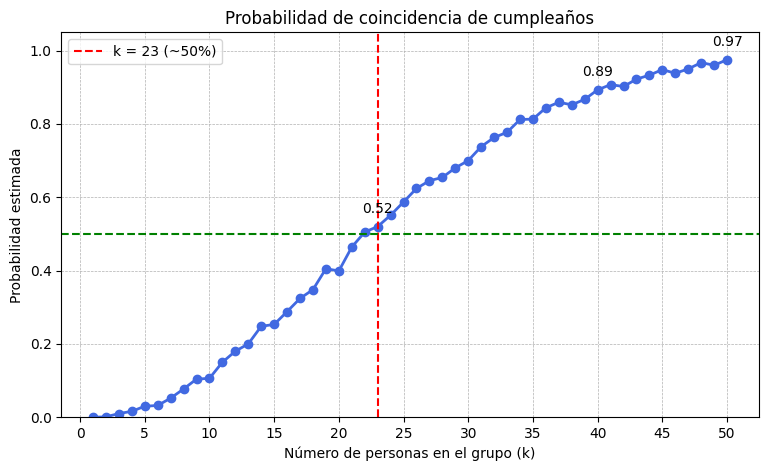


¡Simulación finalizada! 🎉


In [3]:
# --- Main ---
if __name__ == "__main__":
    print("✨ ¡Bienvenido a la simulación del Problema del Cumpleaños! ✨\n\n")
    print("Este programa te ayudará a visualizar el famoso dilema de probabilidad de Gachi y Pachi...\n\n")
    print("Para iniciar, ")

    # --- Semilla ---
    try:
        semilla = input("Ingresa un número para la semilla (Enter = aleatoria): ")
        if semilla.strip():
            semilla = int(semilla)
            rd.seed(semilla)
            print(f"✔️ Semilla fijada en {semilla}. Resultados reproducibles.\n")
        else:
            print("🎲 Usando una semilla aleatoria.\n")
    except ValueError:
        print("⚠️ Entrada no válida. Usando semilla aleatoria.\n")

    # --- k = input de usuario (1...50) ---
    while True:
        try:
            k_usuario = int(input("Ingrese el número de invitados (entre 1 y 50): "))
            if 1 <= k_usuario <= 50:
                break
            print("⚠️ Debe estar entre 1 y 50.\n")
        except ValueError:
            print("⚠️ Ingrese un entero válido.\n")

 # --- Probabilidades para todos los grupos 1..50 ---
    probabilidades = []
    muestras_guardadas = {}

    for k_total in range(1, 51):
        prob_k, muestras = proporcion_coincidencia(k_total, N)
        probabilidades.append(prob_k)
        muestras_guardadas[k_total] = muestras  # guardamos muestras por si queremos mostrarlas

    # --- Resultados para el k elegido ---
    prob_sim = probabilidades[k_usuario - 1]
    muestras = muestras_guardadas[k_usuario]
    prob_teo = prob_teorica(k_usuario)

    print("\n¡Cálculos completos!\n")
    print(f"Probabilidad simulada para k={k_usuario}: {prob_sim:.4f} ({prob_sim*100:.2f}%)")
    print(f"Probabilidad teórica  para k={k_usuario}: {prob_teo:.4f} ({prob_teo*100:.2f}%)")
    print(f"Diferencia (sim - teo): {prob_sim - prob_teo:+.4f}\n")

    # Mostrar 10 simulaciones ejemplo
    print("🎲 Ejemplos de simulaciones:")
    to_show = min(10, N)
    for i in range(to_show):
        muestra = muestras[i]
        marca = "✅ Hay coincidencia" if hay_coincidencia(muestra) else "❌ No hay coincidencia"
        print(f"Muestra {i+1:02d}: {muestra} → {marca}")

# --- Tabla ---
    print("\n📊 Tabla de probabilidades (k de 1 a 50):\n")
    print("-----------------------------------------")
    print("| Personas (k) | Probabilidad Estimada |")
    print("-----------------------------------------")
    for k_tab, prob in enumerate(probabilidades, start=1):
        print(f"| {k_tab:12d} | {prob*100:20.2f}% |")
    print("-----------------------------------------")

    # --- Gráfico ---
    print("\n📈 Generando el gráfico...\n")
    k_valores = list(range(1, 51))

    plt.figure(figsize=(9, 5))
    plt.plot(k_valores, probabilidades, marker="o", linewidth=2, color="royalblue")

    # Líneas de referencia y personalización
    plt.axvline(x=23, linestyle='--', color='red', label='k = 23 (~50%)')
    plt.axhline(y=0.5, linestyle='--', color='green')
    plt.title('Probabilidad de coincidencia de cumpleaños')
    plt.xlabel('Número de personas en el grupo (k)')
    plt.ylabel('Probabilidad estimada')
    plt.xticks(range(0, 51, 5))
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.ylim(0, 1.05)

    # Anotaciones en puntos clave
    for k_point in (23, 40, 50):
        p = probabilidades[k_point - 1]
        plt.annotate(f'{p:.2f}', (k_point, p),
                     textcoords="offset points", xytext=(0, 10), ha='center')

    plt.legend()
    plt.show()

    print("\n¡Simulación finalizada! 🎉")